# Assignment 1: Approximation of mathematical functions

In [2]:
import math
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: Approximating $\log$

Function $\log$ is defined on positive real numbers: $\log(x): \mathcal{R}^+ \rightarrow \mathcal{R}$. The Taylor series for $\log$ has [the following form](https://en.wikipedia.org/wiki/Logarithm):

\begin{align}\log (x)  &= \frac{(x-1)^1}{1} - \frac{(x-1)^2}{2} + \frac{(x-1)^3}{3} - \frac{(x-1)^4}{4} + \cdots \\
&= \sum_{n=1}^\infty (-1)^{n+1}\frac{(x-1)^n}{n}
\end{align}

and converges to $\log$ for $0 < x < 2$. 

1. Implement `log1` that approximates $\log(x),\,0 < x < 2$. 



In [3]:
def log1(x,n):
  ans=0
  for i in range(1,n+1):
    val=(x-1)**i
    ans+=((-1)**(i+1))*(val/i)
    
  return ans

In [4]:
print(log1(0.1,2))
print(log1(1.5,2))
print(log1(1.5,8))
print(log1(1.8,8))

-1.3050000000000002
0.375
0.40531529017857143
0.5790997942857143


 2. * Plot  `math.log` and `log1` for $0.25 ≤ x ≤ 4$ for $n=1,2,4,8$.   
    * Plot the **absolute** error of `log1` compared to `math.log` on $0.01 ≤ x ≤ 1$ for $n=1,8$. Use [plt.plot](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.plot.html): 

   


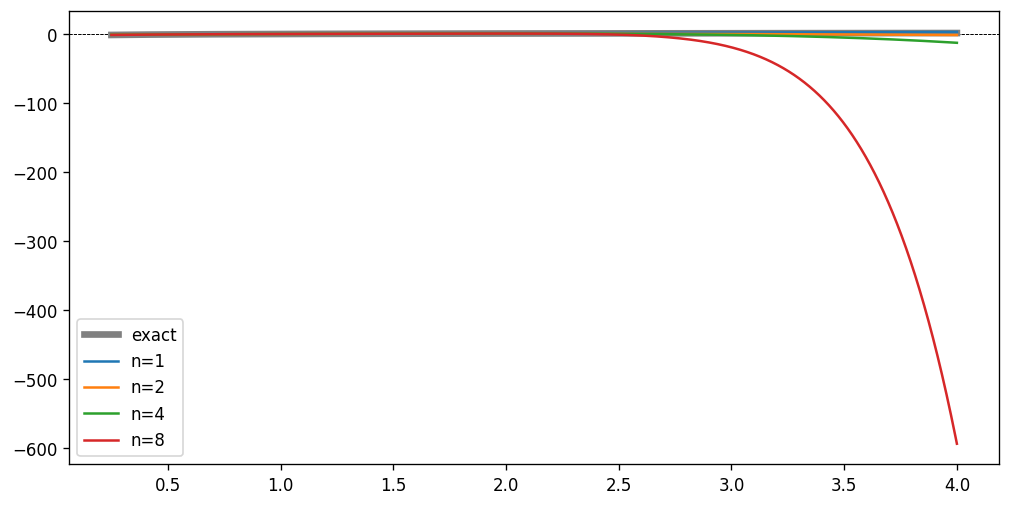

In [5]:
def plot_function(f,g,min=-10,max=10,logfrom=0,until=4):
  #here we need to print a graph mean approximate function with finite number of terms taylor series

  #create vector of lets say 10000 values between min and max.
  x=numpy.linspace(min,max,10000)
  #canvas for the graph
  plt.figure(figsize=(10,5)).set_dpi(120)
  #plot axes x=0,y=0
  plt.axhline(0, ls='--', c='black',lw=0.5)
  plt.axhline(0, ls='--', c='black',lw=0.5)
  #plot the function
  plt.plot(x,g(x),label='exact',c='gray', lw=4)
  #taylor series
  for logn in range(logfrom,until):
    n=2**logn
    y=[f(x1,n) for x1 in x]
    #plot taylor approximate
    plt.plot(x,y,label=f"n={n}")
   #Displaying
  plt.legend()

plot_function(log1,numpy.log,min=0.25,max=4)


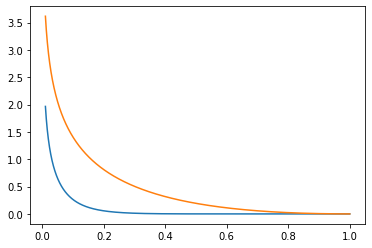

In [6]:
x=numpy.linspace(0.01,1,10000)
froom=log1(x,1)
to=log1(x,8)
z=abs(numpy.log(x)-froom)
y=abs(numpy.log(x)-to)
plt.plot(x,y)
plt.plot(x,z)

3. Implement `log2` that approximates $\log(x),\,0 < x < \infty$. _Hint:_ $\log (e^N\cdot x) = N + \log x$.


In [7]:

def log2(x,n):
  e=2.7182818284590455
  tmp=0
  ans=0
  while(x>=2 or x<=-2 ):
    tmp+=1
    x/=e
  ans=tmp+log1(x,n)
  return ans

In [8]:
print(log2(12,4))
print(log2(3,2))
print(log2(190,3))
print(log2(123,5))

2.472411014083578
1.0982678724638966
5.248284931614169
4.812189282119998


 4. * Plot  `math.log` and `log2` for $0.1 ≤ x ≤ 100$ for $n=1,2,4,8$.   
    * Plot the **relative** error of `log2` compared to `math.log` on $0.1 ≤ x ≤ 100$ for $n=1,8$. Use [plt.plot](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.plot.html): 



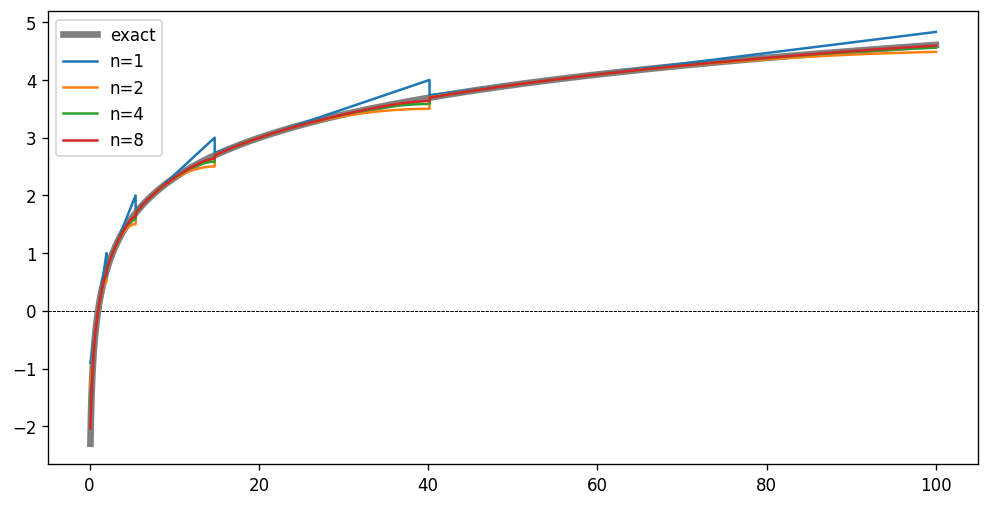

In [9]:
def plot_function(f,g,min=-10,max=10,logfrom=0,until=4):
  #here we need to print a graph mean approximate function with finite number of terms taylor series

  #create vector of lets say 10000 values between min and max.
  x=numpy.linspace(min,max,10000)
  #canvas for the graph
  plt.figure(figsize=(10,5)).set_dpi(120)
  #plot axes x=0,y=0
  plt.axhline(0, ls='--', c='black',lw=0.5)
  plt.axhline(0, ls='--', c='black',lw=0.5)
  #plot the function
  plt.plot(x,g(x),label='exact',c='gray', lw=4)
  #taylor series
  for logn in range(logfrom,until):
    n=2**logn
    y=[f(x1,n) for x1 in x]
    #plot taylor approximate
    plt.plot(x,y,label=f"n={n}")
   #Displaying
  plt.legend()



plot_function(log2,numpy.log,min=0.1,max=100)

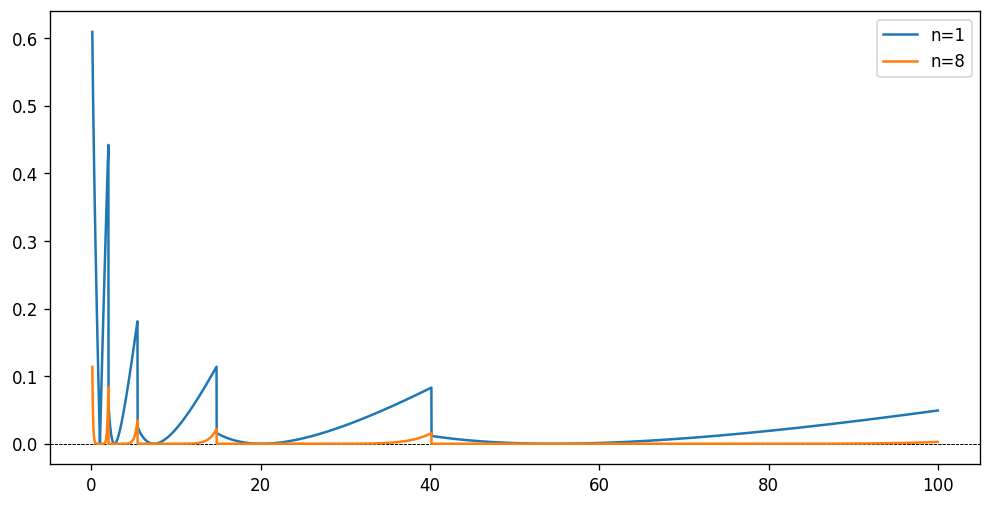

In [10]:
### s3ef 4.2
## here i use code to plot on other way that defferent from 4.1
## but the same goal the twice print the require


def plot_fun(f,g,min,max):
  #here we need to print a graph mean approximate function with finite number of terms taylor series

  #create vector of lets say 10000 values between min and max.
  x=numpy.linspace(min,max,10000)
  #canvas for the graph
  plt.figure(figsize=(10,5)).set_dpi(120)
  #plot axes x=0,y=0
  plt.axhline(0, ls='--', c='black',lw=0.5)
  plt.axhline(0, ls='--', c='black',lw=0.5)

  y=[(abs(f(t,1)-g(t))/abs(g(t))) for t in x]
  plt.plot(x,y,label=f"n={1}")
  y=[(abs(f(t,8)-g(t))/abs(g(t))) for t in x]
  plt.plot(x,y,label=f"n={8}")
  plt.legend()

plot_fun(log2,numpy.log,min=0.1,max=100)



5. What are the maximum absolute and relative errors of `log1` compared to `log2` on interval $0.25 ≤ x ≤ 1.75$? 

In [14]:
for  logofn in range(4):
  n = 2**logofn
  for i in (0.25,0.5,0.75,1.25,1.50,1.75):
    maxabsolute =max(0, log1(i , 100) - log2(i , 100))
    maxrealtive = max(0, (log1(i , 100) - log2(i , 100))/log1(i, 100))


In [15]:
print(maxabsolute)
print(maxrealtive)

0
0


## Question 2: Using approximate versions of  $\log$ and $\exp$

1. Use `logfact`  from [lecture 1 notebook](https://colab.research.google.com/drive/1PS2XZEKAhsV7Wq97Szk1RH93HWuhTyYF) with `math.log` and `math.exp`, to implement the [multinomial coefficients](https://en.wikipedia.org/wiki/Multinomial_theorem#Multinomial_coefficients) for $m=3$ on the log scale:

$$\binom{n}{k_1,k_2,...,k_m} = \frac{n!}{k_1! k_2! \cdot\cdot\cdot k_m!}$$


In [12]:
def logfact(n):
  factl=0
  for i in range(n):
    factl += math.log(i+1)
  return factl



def multinomy(n,k1,k2,k3):
  return round(math.exp(logfact(n)-(logfact(k1)+logfact(k2)+logfact(k3))))




In [ ]:
print(multinomy(13,2,2,9))
print(multinomy(33,12,11,10))
print(multinomy(7,2,2,3))

4290
125149745841120
210


2. Use `log2` from question 1 and `exp2` from the [lecture 2 notebook](https://colab.research.google.com/drive/1PAXmH_v6sQmbmAYrRK48eCfFQWLcQO3K) to implement the approximate computation of the multinomial coefficients for $m=3$:


In [ ]:
#this code from lecutre 2

def exp(x, n):
    """Computes exp(x) with Taylor series approximation upto x^n.
    Returns the approximate value.
    """
    v = 1       # initialize the value to the first term of Taylor series
    xi = x      # initialize the ith power of x to x
    fact = 1    # initialize fact to 0!
    for i in range(1, n+1):
        fact *= i       # compute i!
        v += xi/fact    # add a term to the Taylor series
        xi *= x         # compute the next power of x
    return v    # return the result


In [ ]:


e = 2.7182818284590455
def exp2(x, n):
  v = 1
  if x > 1:
    pow = int(x)   # compute the entire part of x
    v *= e**pow    # exponentiate the entire part efficiently
    x -= pow       # keep only the fractional part of x
  elif x < -1:
    pow = int(-x)
    v /= e**pow
    x += pow
  v *= exp(x, n)   # multiply the value by the approximate exponent
                   # of the fractional part
  return v




def logfact2(n,x):
  factl=0
  for i in range(n):
    factl += log2(i+1,x)
  return factl



In [ ]:
def multinom2(n,k1,k2,k3,tmp):
  return round(exp2(logfact2(n,tmp)-(logfact2(k1,tmp)+logfact2(k2,tmp)+logfact2(k3,tmp)),tmp))



In [ ]:
print(multinom2(13,2,2,9,2))
print(multinom2(22,2,10,10,5))
print(multinom2(5,2,2,1,3))

3492
44434256
33


3. Compute $\binom{10}{2,2,6}$, and $\binom{150}{100, 25,25}$. Compare the running times of `multinomial coefficients` using `log2` and `exp2` vs. `math.log` and `math.exp`.


In [ ]:
%time print("the result of 10,2,2,6 using log2 and exp2",multinom2(10,2,2,6,2))
print("")
%time print("the result of 150,100,25,25 using log2 and exp2",multinom2(150,100,25,25,2))

print("")

%time print("the result of 10,2,2,6 using math.log and math.exp",multinomy(10,2,2,6))
print("")
%time print("the result of 150,100,25,25 using math.log math.exp",multinomy(150,100,25,25))


the result of 10,2,2,6 using log2 and exp2 1222
CPU times: user 0 ns, sys: 1.24 ms, total: 1.24 ms
Wall time: 4.1 ms

the result of 150,100,25,25 using log2 and exp2 1596353098247167916208329416292560758015547397143265280
CPU times: user 1.36 ms, sys: 9 µs, total: 1.37 ms
Wall time: 1.37 ms

the result of 10,2,2,6 using math.log and math.exp 1260
CPU times: user 835 µs, sys: 0 ns, total: 835 µs
Wall time: 901 µs

the result of 150,100,25,25 using math.log math.exp 2544476232379045785963458409835886714436879363285712896
CPU times: user 698 µs, sys: 0 ns, total: 698 µs
Wall time: 703 µs


4. What are the absolute and relative error of `multinomial coefficients` for each combination of arguments — $\binom{10}{2,2,6}$, and $\binom{150}{100, 25,25}$?


In [ ]:
#there is no need for building function
error =abs(multinom2(10,2,2,6,2)-multinomy(10,2,2,6))
valrr = error/multinom2(10,2,2,6,2)*100
print(f"multinom2val={multinom2(10,2,2,6,2)} multinomyval={multinomy(10,2,2,6)} error={error:6g}")
print(f"realtiverror={valrr:.10f}")

error2 =abs(multinom2(150,100,25,25,2)-multinomy(150,100,25,25))
valrr2 = error2/multinom2(150,100,25,25,2)*100
print(f"multinom2val={multinom2(150,100,25,25,2)} multinomyval={multinomy(150,100,25,25)} error={error2:6g}")
print(f"realtiverror={valrr:.10f}")



multinom2val=1222 multinomyval=1260 error=    38
realtiverror=3.1096563011
multinom2val=1596353098247167916208329416292560758015547397143265280 multinomyval=2544476232379045785963458409835886714436879363285712896 error=9.48123e+53
realtiverror=3.1096563011


5. For which $n$(number of Taylor series terms) the absolute difference between the *relative errors* of $\binom{1000}{900, 50,50}$ computed for `n` and `n+1` is smaller than 0.1%? Use the approximation from Q2.2 

In [ ]:
def The_Deff():
  n=8
  x=multinomy(1000,900,50,50)
  a=multinom2(1000,900,50,50,n+1)
  b=multinom2(1000,900,50,50,n)
  tmp1=abs(x-b)
  tmp2=abs(x-a)
  first_ans=tmp1/x*100
  second_ans=tmp2/x*100
  error=abs(first_ans-second_ans)
  if error<0.1:
    print(n)



    



In [ ]:
The_Deff()